In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import shap

In [7]:
df=pd.read_csv("financial_risk_assessment.csv")
df

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.0,700.0,35111.0,Auto,Self-employed,10,Fair,0.155126,79102.0,NaN,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High


In [8]:
df.shape

(15000, 20)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [16]:
df.isna().sum()
print((df.isnull().sum() / len(df)) * 100)

Age                      0.0
Gender                   0.0
Education Level          0.0
Marital Status           0.0
Income                   0.0
Credit Score             0.0
Loan Amount              0.0
Loan Purpose             0.0
Employment Status        0.0
Years at Current Job     0.0
Payment History          0.0
Debt-to-Income Ratio     0.0
Assets Value             0.0
Number of Dependents     0.0
City                     0.0
State                    0.0
Country                  0.0
Previous Defaults        0.0
Marital Status Change    0.0
Risk Rating              0.0
dtype: float64


In [14]:
for column in ['Income', 'Credit Score', 'Loan Amount', 'Assets Value', 'Number of Dependents', 'Previous Defaults']:
    df[column].fillna(df[column].mean(), inplace=True)

C:\Users\Chirag\AppData\Local\Temp\ipykernel_26936\1755168787.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [15]:
df

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.00000,688.0,45713.000000,Business,Unemployed,19,Poor,0.154313,120228.000000,0.00000,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,69933.39851,690.0,33835.000000,Auto,Employed,6,Fair,0.148920,55849.000000,0.00000,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.00000,600.0,36623.000000,Home,Employed,8,Fair,0.362398,180700.000000,3.00000,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.00000,622.0,26541.000000,Personal,Unemployed,2,Excellent,0.454964,157319.000000,3.00000,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.00000,766.0,36528.000000,Personal,Unemployed,10,Fair,0.143242,287140.000000,2.02651,New Heather,IL,Namibia,3.0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.00000,609.0,26187.000000,Home,Self-employed,2,Fair,0.317633,159741.497176,4.00000,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.00000,700.0,35111.000000,Auto,Self-employed,10,Fair,0.155126,79102.000000,2.02651,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.00000,642.0,44369.000000,Home,Unemployed,19,Excellent,0.593999,196930.000000,4.00000,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.00000,638.0,32752.000000,Home,Self-employed,12,Excellent,0.478035,276060.000000,2.02651,Port Wayne,AK,Rwanda,0.0,2,High


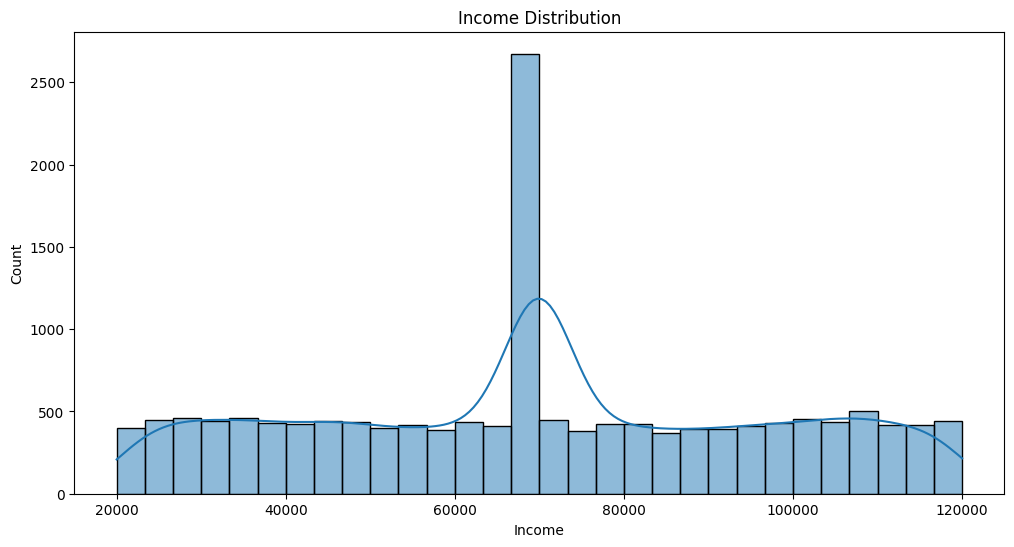

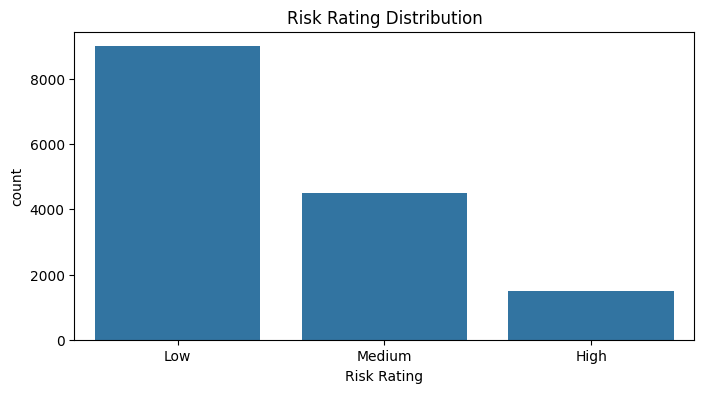

c:\Users\Chirag\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


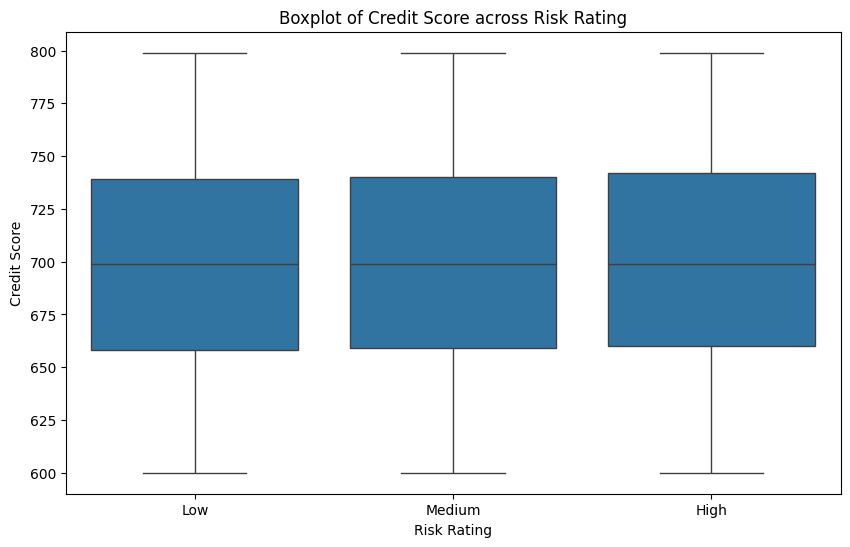

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
plt.figure(figsize=(12, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.show()

# Visualize the distribution of the target variable (Risk Rating)
plt.figure(figsize=(8, 4))
sns.countplot(x='Risk Rating', data=df)
plt.title('Risk Rating Distribution')
plt.show()

# Boxplot to detect outliers in Credit Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk Rating', y='Credit Score', data=df)
plt.title('Boxplot of Credit Score across Risk Rating')
plt.show()


In [18]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print(f'Number of outliers in Income: {len(outliers)}')

Number of outliers in Income: 0


In [21]:
# One-Hot Encoding for categorical features
df_encoded = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Marital Status', 'Loan Purpose', 'Employment Status', 'Payment History', 'City', 'State', 'Country'], drop_first=True,dtype='int64')


In [34]:
df_encoded['Risk Rating'] = df_encoded['Risk Rating'].map({'Low': 0, 'Medium':1,'High': 2})

In [35]:
df_encoded

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0.372049,0.106582,-0.210556,1.529719,1.650699,-1.362787,-0.533762,-1.557532,2.0,2,...,0,0,0,0,0,0,0,0,0,0
1,0.908593,0.000000,-0.172649,0.534811,-0.602523,-1.400265,-1.403416,-1.557532,3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,-1.505856,-0.529872,-1.878458,0.768335,-0.255874,0.083105,0.283115,0.748204,3.0,2,...,0,0,0,0,0,0,0,0,0,0
3,1.042729,-1.615139,-1.461482,-0.076139,-1.295822,0.726309,-0.032724,0.748204,4.0,2,...,0,0,0,0,0,0,0,0,0,0
4,-1.237584,-0.762703,1.267812,0.760378,0.090776,-1.439714,1.720943,0.000000,3.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-1.371720,-0.812505,-1.707877,-0.105791,-1.295822,-0.227945,0.000000,1.516782,2.0,0,...,0,0,0,0,0,0,0,0,0,0
14996,0.841525,1.385812,0.016886,0.641689,0.090776,-1.357143,-1.089306,0.000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
14997,-0.969312,-0.880866,-1.082413,1.417145,1.650699,1.692400,0.502355,1.516782,2.0,1,...,0,0,0,0,0,0,0,0,0,0
14998,0.640321,-1.106630,-1.158227,0.444098,0.437426,0.886619,1.571271,0.000000,0.0,2,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
num_columns = ['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job', 'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[num_columns] = scaler.fit_transform(df_encoded[num_columns])


In [37]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(columns=['Risk Rating'])
y = df_encoded['Risk Rating']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00       300
         Low       0.60      1.00      0.75      1800
      Medium       0.50      0.00      0.00       900

    accuracy                           0.60      3000
   macro avg       0.37      0.33      0.25      3000
weighted avg       0.51      0.60      0.45      3000



c:\Users\Chirag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Chirag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Chirag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [43]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
rf_model = RandomForestClassifier(
    n_estimators=200,  # Increase the number of trees
    max_depth=10,      # Limit tree depth
    class_weight='balanced',
    random_state=42
)

# Train the model again
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate again
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5403333333333333
              precision    recall  f1-score   support

           0       0.60      0.85      0.71      1800
           1       0.30      0.06      0.10       900
           2       0.10      0.08      0.09       300

    accuracy                           0.54      3000
   macro avg       0.33      0.33      0.30      3000
weighted avg       0.46      0.54      0.46      3000



In [44]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Calculate scale_pos_weight as ratio of the majority to minority class
ratio = len(y_train) / (2 * sum(y_train == 2))  # Change 2 to the corresponding encoding for "High"


# Initialize XGBoost model with the scale_pos_weight
xgb_model = xgb.XGBClassifier(scale_pos_weight=ratio, random_state=42)

# Train the model using X_train and y_train
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(pd.get_dummies(y_test, drop_first=True), xgb_model.predict_proba(X_test), multi_class='ovo')
print(f"ROC-AUC: {roc_auc}")


c:\Users\Chirag\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:00:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.5163333333333333
              precision    recall  f1-score   support

           0       0.59      0.76      0.67      1800
           1       0.29      0.19      0.23       900
           2       0.12      0.04      0.06       300

    accuracy                           0.52      3000
   macro avg       0.33      0.33      0.32      3000
weighted avg       0.46      0.52      0.48      3000



IndexError: index 2 is out of bounds for axis 1 with size 2

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'scale_pos_weight': [ratio]  # Use calculated ratio
}

xgb_model = xgb.XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1_weighted', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\Chirag\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:02:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Chirag\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:02:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Chirag\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:02:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are